In [50]:
#importing libraries 
#and managing the dataset from kaggle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [39]:
df = pd.read_csv(r"C:\Users\ishaa\OneDrive\Desktop\InternshipGenAI\kaggleDATA\insuranceDatasetRandomForest\insurance.csv")
print(df.head())
print(df.info())


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [40]:
#converting the features like sex--> male(1) and female(0) as random forest wont understand the textual content 
le = LabelEncoder()
# Convert each categorical column into numeric
df['sex'] = le.fit_transform(df['sex'])         # male = 1, female = 0
df['smoker'] = le.fit_transform(df['smoker'])   # yes = 1, no = 0
df['region'] = le.fit_transform(df['region'])   # each region gets a unique number



In [41]:
#now splitting into a and b ( matrix ) and Target Values 
x = df.drop('expenses', axis=1)  # All columns except 'expenses'
y = df['expenses']               # Only the target column
print(x.shape)
print(y.shape)



(1338, 6)
(1338,)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(936, 6)
(936,)
(402, 6)
(402,)


In [43]:
rf = RandomForestRegressor(n_estimators = 100,
                            oob_score = True,
                            random_state=42,
                            max_depth=7)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, oob_score=True, random_state=42)

In [44]:
y_predicted = rf.predict(x_test)
print(y_predicted)
print(y_predicted.shape)

[ 9620.94540288  5319.38950404 27926.23640082 10267.08162097
 34409.5814596   5971.06922754  2291.83733894 13995.21667067
  6216.82047608 10810.05467525 19563.64299091  7191.38354066
  5005.95433434 46020.77311527 48060.40466569 44714.87670357
 10861.45421302 43263.59508215 10234.4105388  25128.24032473
  5481.4575994   9447.20930151  1909.70243628  3672.45257101
 12002.29737435 12851.26476554 14173.32599266  6320.50910556
 11638.50893327  2942.17741093  7384.89722975 12044.21534443
  2932.30867657  5951.27933668  4329.74939259 11206.7494362
  3521.11117303  8060.22278841 24094.14576514 40602.8869467
  8666.67612715  3942.56553905 14150.32675144 14462.77586979
  6298.36072401 16908.96558244 12525.30739658  6073.6381786
 41797.53563935  5582.97100884 13957.28189274  2752.9249645
  7694.88744539  2086.9293667  11805.0977748  12278.0072716
  4049.58092585 45988.74028157 12262.00525577 13779.18023321
 14014.60928691  5898.78087458 19548.30430285  7151.66241931
 12212.93361622  6001.0138284

In [51]:
#checking the accuracy 
print("the MeanSE -> " , mean_squared_error(y_predicted, y_test))
print("the MeanAE -> " , mean_absolute_error(y_predicted, y_test))
print(r2_score(y_predicted,y_test))



the MeanSE ->  19717045.194756012
the MeanAE ->  2482.1983352981333
0.8588521047200797


DecisionTreeRegressor(max_depth=7, max_features=1.0, random_state=1608637542)


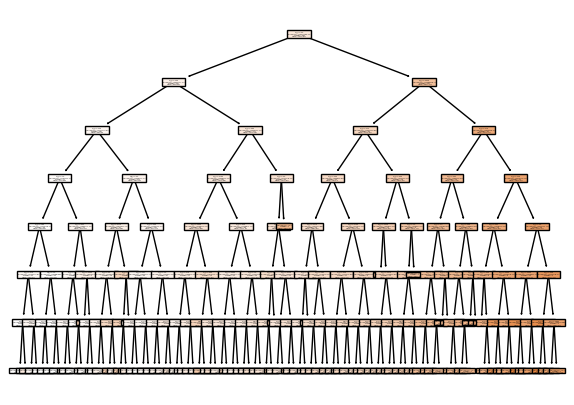

In [46]:
tree0 = rf.estimators_[0]
print(tree0)


plt.figure(figsize=(7,5))
plot_tree(tree0, filled=True)
plt.show()

DecisionTreeRegressor(max_depth=7, max_features=1.0, random_state=1273642419)


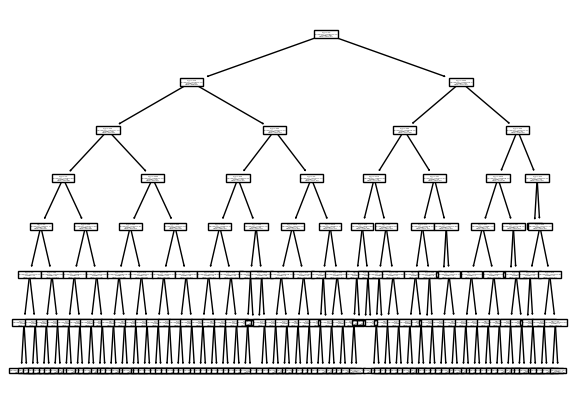

In [47]:
tree01 = rf.estimators_[1]
print(tree01)


plt.figure(figsize=(7,5))
plot_tree(tree01)
plt.show()

In [48]:

input_data = [29, 1, 26.5, 1, 0, 2]  # age, sex, bmi, children, smoker, region ...... the age in int , sex-> male 1, female 0 , bmi in float , childern int... smoker 1,0 ..... region 0,1,2 

# Predict using the trained model
predicted_expense = rf.predict([input_data])

# Output the result
print((predicted_expense))


[4866.90485017]


c:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
y_predicted2 = rf.predict(x_test)

first_actual = y_test.values[0]
first_predicted = y_predicted2[0]

print("Actual", (first_actual))
print("Predicted",(first_predicted))



Actual 9095.07
Predicted 9620.945402876356


In [55]:
# Predict on test data
y_pred = rf.predict(x_test)
actual = y_test.values  # Convert y_test to array for indexing

# Print first 20 values
for i in range(20):
    print(f"{i+1}. Actual: ₹{actual[i]}  | Predicted: ₹{y_pred[i]}")


1. Actual: ₹9095.07  | Predicted: ₹9620.945402876356
2. Actual: ₹5272.18  | Predicted: ₹5319.389504037789
3. Actual: ₹29330.98  | Predicted: ₹27926.236400815025
4. Actual: ₹9301.89  | Predicted: ₹10267.08162097068
5. Actual: ₹33750.29  | Predicted: ₹34409.581459600115
6. Actual: ₹4536.26  | Predicted: ₹5971.069227540903
7. Actual: ₹2117.34  | Predicted: ₹2291.837338938576
8. Actual: ₹14210.54  | Predicted: ₹13995.216670671996
9. Actual: ₹3732.63  | Predicted: ₹6216.820476084665
10. Actual: ₹10264.44  | Predicted: ₹10810.054675251351
11. Actual: ₹18259.22  | Predicted: ₹19563.642990905697
12. Actual: ₹7256.72  | Predicted: ₹7191.383540658996
13. Actual: ₹3947.41  | Predicted: ₹5005.954334340482
14. Actual: ₹46151.12  | Predicted: ₹46020.773115269316
15. Actual: ₹48673.56  | Predicted: ₹48060.40466569127
16. Actual: ₹44202.65  | Predicted: ₹44714.87670356894
17. Actual: ₹9800.89  | Predicted: ₹10861.454213021969
18. Actual: ₹42969.85  | Predicted: ₹43263.59508215221
19. Actual: ₹8233.1  